### Importing packages and dataset

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Run this cell to mount your drive and make sure the dataset in the directory specified in the following cell
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/MyDrive/data.csv')
labels = pd.read_csv('drive/MyDrive/labels.csv')

In [ ]:
data.shape, labels.shape

((801, 20532), (801, 2))

In [ ]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


### Pre-processing

#### Replacing categorical terms by numbers for convenience

In [ ]:
labels["Class"].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [ ]:
labels["Class"].replace(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], 
                        [0, 1, 2, 3, 4], inplace=True)

In [ ]:
labels.head()

,Unnamed: 0,Class
0,sample_0,0
1,sample_1,1
2,sample_2,0
3,sample_3,0
4,sample_4,2


#### Some tidying

In [ ]:
df = data.drop(data.columns[0],axis=1)
labels = labels.drop(labels.columns[0],axis=1)

In [ ]:
descriptiondf = df.describe()
descriptiondf

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


Some genes (for e.g Gene 5) aren't expressed in any of the samples. Such features can be removed.
Further, there is some variation in scaling of different features, so we need to normalize the dataset for better model performance in some cases.

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.0,0.0,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.0,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


267 features had all zeroes

In [ ]:
COLUMN = []
for col in descriptiondf.columns:
  if(descriptiondf[col]['std'] == 0):
    COLUMN.append(col)
len(COLUMN)

267

Hence, there are no columns having standard deviation of zero, hence we can move ahead with these features

In [ ]:
labels.value_counts()

Class
2        300
3        146
1        141
0        136
4         78
dtype: int64

Class 2 (BRCA) has most number of samples while Class 4 (COAD) has least number of samples. All samples are not equally distributed among the five types of tumours.

### Data Preparation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.30, random_state=0, stratify = labels)

In [ ]:
X_train.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,...,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,0.024719,3.025860,3.104406,6.722406,9.822116,7.400644,0.494526,0.021149,0.019207,0.685398,...,5.890973,8.757623,10.054807,4.852530,9.738123,11.744724,10.136833,9.595342,5.507192,0.097909
std,0.129496,1.202432,1.048483,0.657144,0.505296,1.116841,0.517688,0.154954,0.244681,1.232141,...,0.728279,0.610825,0.385124,2.387135,0.524356,0.659169,0.567943,0.568637,2.106359,0.373180
min,0.000000,0.000000,0.000000,5.009284,8.555398,3.930747,0.000000,0.000000,0.000000,0.000000,...,3.272068,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.753091,0.000000
25%,0.000000,2.301060,2.412441,6.295379,9.458238,6.619854,0.000000,0.000000,0.000000,0.000000,...,5.452116,8.355375,9.810576,3.275597,9.416073,11.324906,9.791673,9.262952,4.037215,0.000000
50%,0.000000,3.193352,3.153826,6.651843,9.805857,7.408988,0.436055,0.000000,0.000000,0.305379,...,5.967645,8.778196,10.069805,5.413124,9.789386,11.743913,10.143013,9.584154,5.147901,0.000000
75%,0.000000,3.910766,3.790861,7.041829,10.165990,8.102730,0.792870,0.000000,0.000000,0.875164,...,6.391673,9.157158,10.306543,6.693145,10.075696,12.172270,10.550461,9.935278,6.881820,0.000000
max,1.241108,6.051542,6.063484,10.129528,11.151461,10.718190,2.779008,1.785592,4.067604,12.293023,...,7.769263,11.105431,11.318243,9.207495,11.449443,13.600680,11.675653,12.813320,11.205836,5.254133


#### Creating scaled version of the dataset

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Dimensionality Reduction

With 20264 features, we should be able to reduce the dimesionality of the dataset greatly while explaining the variance above a certain threshold. This is can be done through PCA. Or, we can perform feature selection by removing correlated variables.

##### PCA

In [ ]:
pca = PCA()
pca.fit_transform(X_train)
total = sum(pca.explained_variance_)
k = 0
current_variance = [0]
while sum(current_variance)/total < 0.99:
    current_variance.append(pca.explained_variance_[k])
    k = k + 1
    
print(k, "features explain around 99% of the variance.")

pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

500 features explain around 99% of the variance.


In order to visualize these, we can plot the first three principal components in 3D and first two in 2D

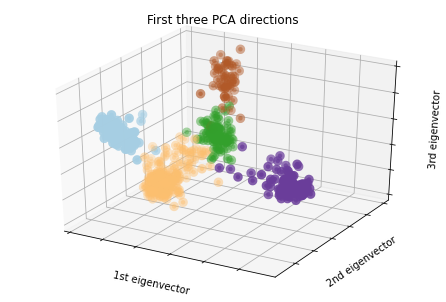

In [ ]:
pca = PCA(n_components=3).fit(X_train)
X_train_pca3 = pca.transform(X_train)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_pca3[:, 0], X_train_pca3[:, 1], X_train_pca3[:, 2], c = y_train.iloc[:,0], cmap = plt.cm.Paired, linewidths=5)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

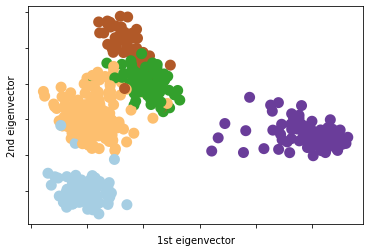

In [ ]:
fig, ax = plt.subplots() 
plt.scatter(X_train_pca3[:, 0],  X_train_pca3[:, 1], c = y_train.iloc[:,0], cmap = plt.cm.Paired, linewidths=5)
ax.set_xlabel("1st eigenvector")
ax.set_xticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticklabels([])
plt.show()

#### Feature Selection

**Dataset with dimensionality reduced from Correlation Coefficients**

We are considering 3 correlation coefficient thresholds, 0.8, 0.6, 0.4 and 0.2, to take independent features into account.

In [ ]:
# Defining the function which will return the columns that should be selected for independent features
# k - correlation coefficient threshold
def SelectColumnCorrelation(k):
  corr = np.corrcoef(X_train.values, rowvar=False)
  columns = np.full((corr.shape[0],), True, dtype=bool)

  for i in range(corr.shape[0]):
      for j in range(i+1, corr.shape[0]):
          if corr[i,j] >= k:
              if columns[j]:
                  columns[j] = False
                  
  selected_columns = X_train.columns[columns]
  return selected_columns

We have already divided our dataset into 30% test and 70% train, which will remain intact till end of the analysis

In [ ]:
# Selecting the columns for different correlations
selected_columns_8 = SelectColumnCorrelation(0.8)   # features having correlations less than 0.8
selected_columns_6 = SelectColumnCorrelation(0.6)   # features having correlations less than 0.6
selected_columns_4 = SelectColumnCorrelation(0.4)   # features having correlations less than 0.4
selected_columns_2 = SelectColumnCorrelation(0.2)   # features having correlations less than 0.2

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
selected_columns_3 = SelectColumnCorrelation(0.3)   # features having correlations less than 0.3

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
print(len(selected_columns_8))
print(len(selected_columns_6))
print(len(selected_columns_4))
print(len(selected_columns_3))
print(len(selected_columns_2))

18307
8848
1665
424
51


We have got the number of features whose correlation coefficients are lesser than the given thresholds.

And previously, from PCA we got 500 features whose explained variance is around 99%

Moreover, we have total 5 datasets, on which we can benchmark machine learning models and neural networks.

In [ ]:
# Preparing the arrays to apply models
DIM = [18307, 8848, 1665, 500, 424, 51]
DES = ['Correlation less than 0.8', 'Correlation less than 0.6', 'Correlation less than 0.4',
       'PCA-explained variance of 99%', 'Correlation less than 0.3', 'Correlation less than 0.2']
DATA_TRAIN = [X_train[selected_columns_8], X_train[selected_columns_6], X_train[selected_columns_4],
        X_train_pca, X_train[selected_columns_3], X_train[selected_columns_2]]
DATA_TEST = [X_test[selected_columns_8], X_test[selected_columns_6], X_test[selected_columns_4],
        X_test_pca, X_test[selected_columns_3], X_test[selected_columns_2]]

### Clustering

Unsupervised clustering using normalised data

K-means accuracy: 0.477


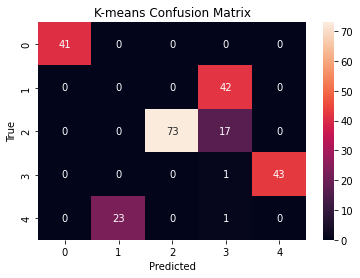

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train_scaled)
km_pred = kmeans.predict(X_test_scaled)

print('K-means accuracy:', round(accuracy_score(y_test.iloc[:,0], km_pred), 3))

cm_km = confusion_matrix(y_test.iloc[:,0], km_pred)

ax = plt.subplot()
sns.heatmap(cm_km, annot=True, ax = ax) 

ax.set_xlabel('Predicted')
ax.set_ylabel('True') 
ax.set_title('K-means Confusion Matrix') 

plt.show()

### Supervised Learning Models

We are going to produce deep benchmarkings of Machine Learning and Deep Learning methods on the dataset with different parameters in this section.

We have 2 dimensionally reduced datasets, one from the PCA, which is a projection of all the features into a lower dimensional space, and other one is by eliminating highly correlated features.

In [ ]:
# Building a Generalized function for training through given model classifier
# Will return classification accuracy and F1 score by training the given model
def ModelTrainer(X_train, y_train, X_test, y_test, classifier):
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  f1score = f1_score(y_test, y_pred, average = 'weighted')

  return acc, f1score

#### Naive Bayes Classifier

**Gaussian NB**

In [ ]:
# Training on Gaussian NB
classifier = GaussianNB()

ACCURACY = []
F1SCORE = []
for i in range(len(DATA_TRAIN)):
  Acc, FScore = ModelTrainer(DATA_TRAIN[i], y_train, DATA_TEST[i], y_test, classifier)
  ACCURACY.append(Acc)
  F1SCORE.append(FScore)

In [ ]:
# Visualizing Results in Dataframe
result_df = pd.DataFrame()
result_df['Dimensions'] = DIM
result_df['Description'] = DES
result_df['Accuracy'] = ACCURACY
result_df['F1 Score'] = F1SCORE
result_df

,Dimensions,Description,Accuracy,F1 Score
0,18307,Correlation less than 0.8,0.763485,0.741594
1,8848,Correlation less than 0.6,0.697095,0.666853
2,1665,Correlation less than 0.4,0.734440,0.717946
3,500,PCA-explained variance of 99%,0.979253,0.979617
4,424,Correlation less than 0.3,0.659751,0.670703
5,51,Correlation less than 0.2,0.215768,0.182395


**Tunning on Variance Smoothing**

In [ ]:
# Tunning on var_smoothing
# defining parameter range
SMOOTH = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-15, 1e-20]
GRID_ACC = []
GRID_F1 = []
GRID_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
GRID_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in SMOOTH:
  PRED = []
  F1 = []
  classifier = GaussianNB(var_smoothing = c)
  for i in range(len(GRID_TRAIN)):
    Acc, FScore = ModelTrainer(GRID_TRAIN[i], y_train, GRID_TEST[i], y_test, classifier)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

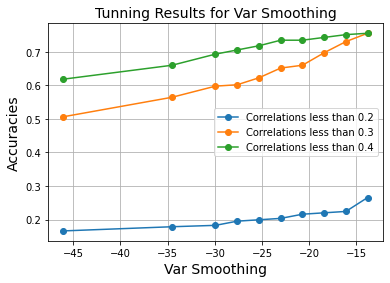

In [ ]:
# Visualizing Results - Accuracy
plt.plot(np.log(SMOOTH), acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(np.log(SMOOTH), acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(np.log(SMOOTH), acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Var Smoothing', fontsize=14)
plt.xlabel('Var Smoothing', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

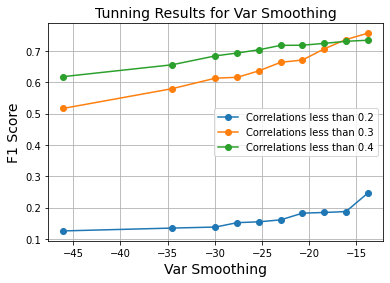

In [ ]:
# Visualizing Results - F1 Score
plt.plot(np.log(SMOOTH), f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(np.log(SMOOTH), f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(np.log(SMOOTH), f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Var Smoothing', fontsize=14)
plt.xlabel('Var Smoothing', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Tunning Different types of Naive Bayes Classifiers**

In [ ]:
# defining model array
NAIVEBAYES = [GaussianNB(), BernoulliNB(), ComplementNB(), MultinomialNB()]
GRID_ACC = []
GRID_F1 = []
GRID_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
GRID_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in NAIVEBAYES:
  PRED = []
  F1 = []
  classifier = c
  for i in range(len(GRID_TRAIN)):
    Acc, FScore = ModelTrainer(GRID_TRAIN[i], y_train, GRID_TEST[i], y_test, classifier)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

In [ ]:
NBgraph = []
for nb in NAIVEBAYES:
  NBgraph.append(str(nb)[:-2])
NBgraph

['GaussianNB', 'BernoulliNB', 'ComplementNB', 'MultinomialNB']

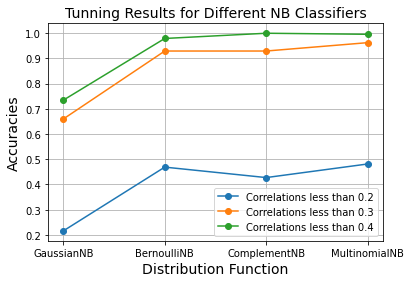

In [ ]:
# Visualizing Results - Accuracy
plt.plot(NBgraph, acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(NBgraph, acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(NBgraph, acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Different NB Classifiers', fontsize=14)
plt.xlabel('Distribution Function', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

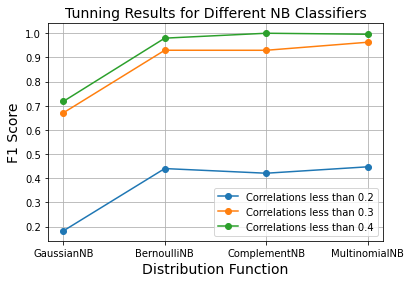

In [ ]:
# Visualizing Results - F1 Score
plt.plot(NBgraph, f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(NBgraph, f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(NBgraph, f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Different NB Classifiers', fontsize=14)
plt.xlabel('Distribution Function', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#### Logistic Regression

In [ ]:
# defining function for finding the results of logistic regression for different datasets
# this function will return accuracy from the trained model on test data
def LogisticRegressionFunction(X_train, y_train, X_test, y_test):
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  f1score = f1_score(y_test, y_pred, average = 'weighted')

  return acc, f1score

In [ ]:
ACCURACY = []
F1SCORE = []

In [ ]:
# Applying Logistic Regression on the data

for i in range(len(DATA_TRAIN)):
  Acc, FScore = LogisticRegressionFunction(DATA_TRAIN[i], y_train, DATA_TEST[i], y_test)
  ACCURACY.append(Acc)
  F1SCORE.append(FScore)

In [ ]:
# Visualizing Results in Dataframe
result_df = pd.DataFrame()
result_df['Dimensions'] = DIM
result_df['Description'] = DES
result_df['Accuracy'] = ACCURACY
result_df['F1 Score'] = F1SCORE
result_df

,Dimensions,Description,Accuracy,F1 Score
0,18307,Correlation less than 0.8,1.000000,1.000000
1,8848,Correlation less than 0.6,1.000000,1.000000
2,1665,Correlation less than 0.4,1.000000,1.000000
3,500,PCA-explained variance of 99%,1.000000,1.000000
4,424,Correlation less than 0.3,0.946058,0.946211
5,51,Correlation less than 0.2,0.589212,0.588333


From the above table, we can see that we can find biomarkers through feature selection in the range of dimensions where correlation is less than 0.3

#### Support Vector Machine

In [ ]:
# Training on SVC
classifier = SVC()

ACCURACY = []
F1SCORE = []
for i in range(len(DATA_TRAIN)):
  Acc, FScore = ModelTrainer(DATA_TRAIN[i], y_train, DATA_TEST[i], y_test, classifier)
  ACCURACY.append(Acc)
  F1SCORE.append(FScore)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
# Visualizing Results in Dataframe
result_df = pd.DataFrame()
result_df['Dimensions'] = DIM
result_df['Description'] = DES
result_df['Accuracy'] = ACCURACY
result_df['F1 Score'] = F1SCORE
result_df

,Dimensions,Description,Accuracy,F1 Score
0,18307,Correlation less than 0.8,1.000000,1.000000
1,8848,Correlation less than 0.6,1.000000,1.000000
2,1665,Correlation less than 0.4,0.995851,0.995838
3,500,PCA-explained variance of 99%,1.000000,1.000000
4,424,Correlation less than 0.3,0.937759,0.937952
5,51,Correlation less than 0.2,0.373444,0.203081


Here we can see for dimensions 1665, 424, and 51, the testing accuracy is not 100%. Hence we will carry out hyper-parameter tunning for these datasets.

**Hyper-parameter tunning for 1665, 424, and 51 dimensions**

**Tunning on C**

In [ ]:
# Tunning on C
# defining parameter range
C = [0.1, 1, 10, 100, 1000]
GRID_ACC = []
GRID_F1 = []
DATA_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
DATA_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in C:
  PRED = []
  F1 = []
  classifier = SVC(C = c)
  for i in range(len(DATA_TRAIN)):
    Acc, FScore = ModelTrainer(DATA_TRAIN[i], y_train, DATA_TEST[i], y_test, classifier)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

In [ ]:
# Defining a function for line graph maker

def LineGraphMaker(X, y, xlabel, ylabel, title):
  plt.plot(X, y, color='red', marker='o')
  plt.title(title, fontsize=14)
  plt.xlabel(xlabel, fontsize=14)
  plt.ylabel(ylabel, fontsize=14)
  plt.grid(True)
  plt.show()

Showing Tunning Results for data with 1665 dims - Correlations less than 0.4

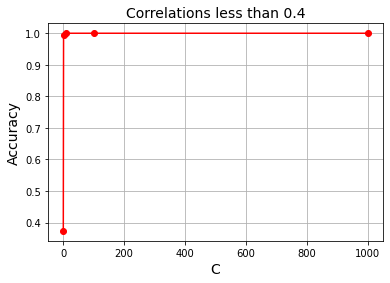

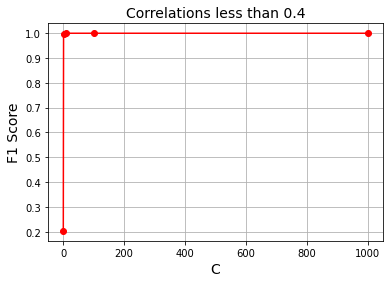

In [ ]:
# Showing Tunning Results for data with 1665 dims
acc_arr = []
f1_arr = []
for i in range(len(GRID_ACC)):
  acc_arr.append(GRID_ACC[i][0])
  f1_arr.append(GRID_F1[i][0])

LineGraphMaker(C, acc_arr, 'C', 'Accuracy', 'Correlations less than 0.4')
LineGraphMaker(C, f1_arr, 'C', 'F1 Score', 'Correlations less than 0.4')

In [ ]:
result_df = pd.DataFrame()
result_df['C'] = C
result_df['Accuracy'] = acc_arr
result_df['F1 Score'] = f1_arr
result_df

,C,Accuracy,F1 Score
0,0.1,0.373444,0.203081
1,1.0,0.995851,0.995838
2,10.0,1.000000,1.000000
3,100.0,1.000000,1.000000
4,1000.0,1.000000,1.000000


Showing Tunning Results for data with 424 dims - Correlations less than 0.3

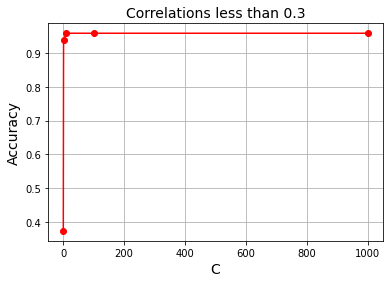

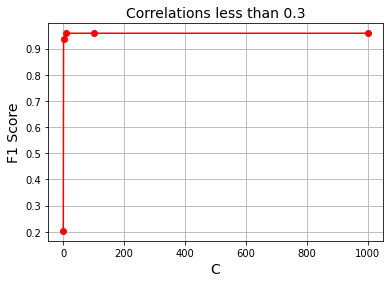

In [ ]:
# Showing Tunning Results for data with 424 dims
acc_arr = []
f1_arr = []
for i in range(len(GRID_ACC)):
  acc_arr.append(GRID_ACC[i][1])
  f1_arr.append(GRID_F1[i][1])

LineGraphMaker(C, acc_arr, 'C', 'Accuracy', 'Correlations less than 0.3')
LineGraphMaker(C, f1_arr, 'C', 'F1 Score', 'Correlations less than 0.3')

In [ ]:
result_df = pd.DataFrame()
result_df['C'] = C
result_df['Accuracy'] = acc_arr
result_df['F1 Score'] = f1_arr
result_df

,C,Accuracy,F1 Score
0,0.1,0.373444,0.203081
1,1.0,0.937759,0.937952
2,10.0,0.958506,0.958606
3,100.0,0.958506,0.958606
4,1000.0,0.958506,0.958606


Showing Tunning Results for data with 51 dims - Correlations less than 0.2

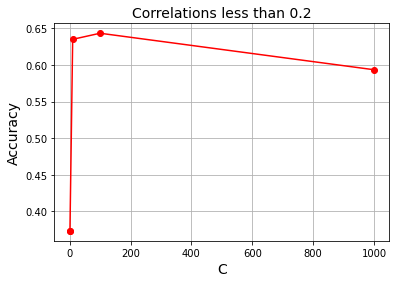

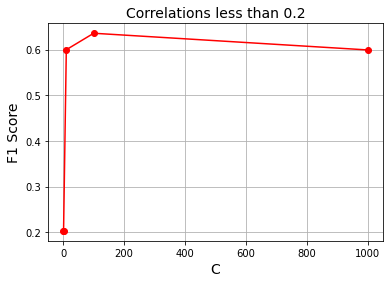

In [ ]:
# Showing Tunning Results for data with 51 dims
acc_arr = []
f1_arr = []
for i in range(len(GRID_ACC)):
  acc_arr.append(GRID_ACC[i][2])
  f1_arr.append(GRID_F1[i][2])

LineGraphMaker(C, acc_arr, 'C', 'Accuracy', 'Correlations less than 0.2')
LineGraphMaker(C, f1_arr, 'C', 'F1 Score', 'Correlations less than 0.2')

In [ ]:
result_df = pd.DataFrame()
result_df['C'] = C
result_df['Accuracy'] = acc_arr
result_df['F1 Score'] = f1_arr
result_df

,C,Accuracy,F1 Score
0,0.1,0.373444,0.203081
1,1.0,0.373444,0.203081
2,10.0,0.634855,0.599769
3,100.0,0.643154,0.635839
4,1000.0,0.593361,0.599280


**Tunning on Kernel**

In [ ]:
# Tunning on Kernel
# defining parameter range
KERNEL = ['rbf', 'poly', 'linear', 'sigmoid']
GRID_ACC = []
GRID_F1 = []
DATA_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
DATA_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in KERNEL:
  PRED = []
  F1 = []
  classifier = SVC(kernel = c)
  for i in range(len(DATA_TRAIN)):
    Acc, FScore = ModelTrainer(DATA_TRAIN[i], y_train, DATA_TEST[i], y_test, classifier)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

Showing Tunning Results for data for tunning on Kernels

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

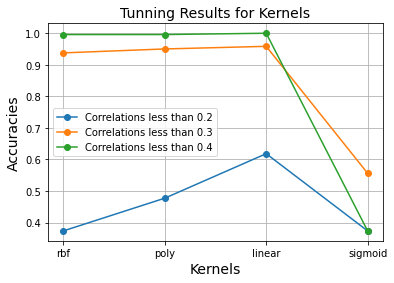

In [ ]:
# Visualizing Results - Accuracy
plt.plot(KERNEL, acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(KERNEL, acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(KERNEL, acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Kernels', fontsize=14)
plt.xlabel('Kernels', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

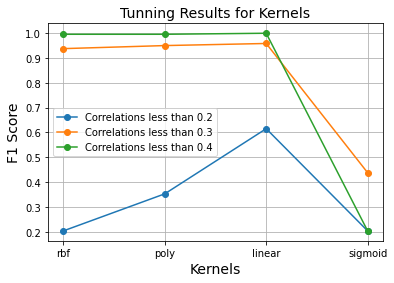

In [ ]:
# Visualizing Results - F1 Score
plt.plot(KERNEL, f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(KERNEL, f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(KERNEL, f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Kernels', fontsize=14)
plt.xlabel('Kernels', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

We can see from the above analysis, that sigmoid kernel is the worst.

And for dataset having correlations less than 0.2, linear kernel is best

#### K-nearest Neighbours

In [ ]:
# Preparing the arrays to apply models
DIM = [18307, 8848, 1665, 500, 424, 51]
DES = ['Correlation less than 0.8', 'Correlation less than 0.6', 'Correlation less than 0.4',
       'PCA-explained variance of 99%', 'Correlation less than 0.3', 'Correlation less than 0.2']
DATA_TRAIN = [X_train[selected_columns_8], X_train[selected_columns_6], X_train[selected_columns_4],
        X_train_pca, X_train[selected_columns_3], X_train[selected_columns_2]]
DATA_TEST = [X_test[selected_columns_8], X_test[selected_columns_6], X_test[selected_columns_4],
        X_test_pca, X_test[selected_columns_3], X_test[selected_columns_2]]
ACCURACY = []
F1SCORE = []

In [ ]:
# Training on K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=100)

for i in range(len(DATA_TRAIN)):
  Acc, FScore = ModelTrainer(DATA_TRAIN[i], y_train, DATA_TEST[i], y_test, classifier)
  ACCURACY.append(Acc)
  F1SCORE.append(FScore)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
# Visualizing Results in Dataframe
result_df = pd.DataFrame()
result_df['Dimensions'] = DIM
result_df['Description'] = DES
result_df['Accuracy'] = ACCURACY
result_df['F1 Score'] = F1SCORE
result_df

,Dimensions,Description,Accuracy,F1 Score
0,18307,Correlation less than 0.8,0.991701,0.991679
1,8848,Correlation less than 0.6,0.995851,0.995831
2,1665,Correlation less than 0.4,0.871369,0.871235
3,500,PCA-explained variance of 99%,0.991701,0.991679
4,424,Correlation less than 0.3,0.767635,0.759863
5,51,Correlation less than 0.2,0.431535,0.320198


**Here we can see for dimensions 1665, 424, and 51, the testing accuracy is not 100%. Hence we will carry out hyper-parameter tunning for these datasets**

**Tunning on Number of Nearest Neighbourhoods**

In [ ]:
# Tunning on n_neighbor
# defining parameter range
NEIGHBOR = [i*10 for i in range(1, 11)]
GRID_ACC = []
GRID_F1 = []
GRID_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
GRID_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in NEIGHBOR:
  PRED = []
  F1 = []
  classifier = KNeighborsClassifier(n_neighbors = c)
  for i in range(len(GRID_TRAIN)):
    Acc, FScore = ModelTrainer(GRID_TRAIN[i], y_train, GRID_TEST[i], y_test, classifier)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

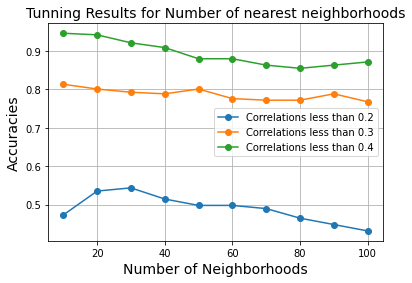

In [ ]:
# Visualizing Results - Accuracy
plt.plot(NEIGHBOR, acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(NEIGHBOR, acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(NEIGHBOR, acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Number of nearest neighborhoods', fontsize=14)
plt.xlabel('Number of Neighborhoods', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

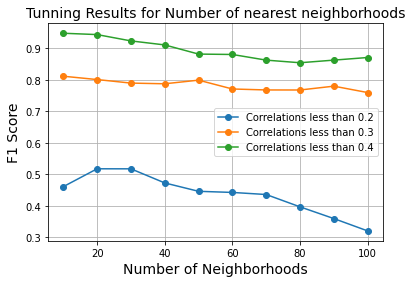

In [ ]:
# Visualizing Results - F1 Score
plt.plot(NEIGHBOR, f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(NEIGHBOR, f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(NEIGHBOR, f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Number of nearest neighborhoods', fontsize=14)
plt.xlabel('Number of Neighborhoods', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

We can see from the above 2 graphs, n_neighbors = 30 is best for the data whose correlations are less than 0.2, whereas n_neighbors = 50 is best for correlations are less than 0.3

#### Random Forest Classifier

In [ ]:
# Training on RFC
classifier = RandomForestClassifier()

ACCURACY = []
F1SCORE = []
for i in range(len(DATA_TRAIN)):
  Acc, FScore = ModelTrainer(DATA_TRAIN[i], y_train, DATA_TEST[i], y_test, classifier)
  ACCURACY.append(Acc)
  F1SCORE.append(FScore)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  af

In [ ]:
# Visualizing Results in Dataframe
result_df = pd.DataFrame()
result_df['Dimensions'] = DIM
result_df['Description'] = DES
result_df['Accuracy'] = ACCURACY
result_df['F1 Score'] = F1SCORE
result_df

,Dimensions,Description,Accuracy,F1 Score
0,18307,Correlation less than 0.8,0.995851,0.995838
1,8848,Correlation less than 0.6,0.995851,0.995838
2,1665,Correlation less than 0.4,0.975104,0.975181
3,500,PCA-explained variance of 99%,0.987552,0.987587
4,424,Correlation less than 0.3,0.929461,0.929269
5,51,Correlation less than 0.2,0.659751,0.651427


**Here we can see for dimensions 1665, 424, and 51, the testing accuracy is not 100%. Hence we will carry out hyper-parameter tunning for these datasets**

**Tunning on Number of Estimators**

In [ ]:
# Tunning on n_estimators
# defining parameter range
NEST = [i*20 for i in range(1, 21)]
GRID_ACC = []
GRID_F1 = []
GRID_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
GRID_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in NEST:
  PRED = []
  F1 = []
  classifier = RandomForestClassifier(n_estimators = c)
  for i in range(len(GRID_TRAIN)):
    Acc, FScore = ModelTrainer(GRID_TRAIN[i], y_train, GRID_TEST[i], y_test, classifier)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

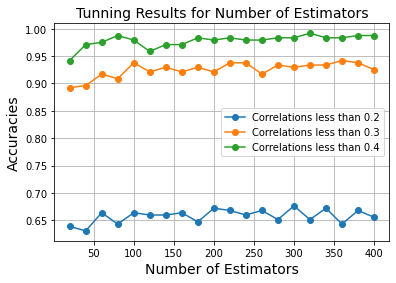

In [ ]:
# Visualizing Results - Accuracy
plt.plot(NEST, acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(NEST, acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(NEST, acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Number of Estimators', fontsize=14)
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

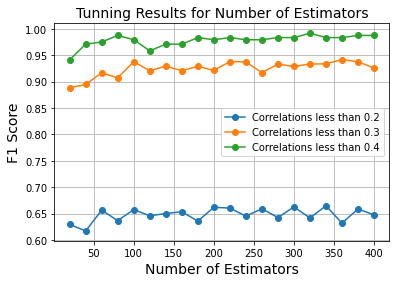

In [ ]:
# Visualizing Results - F1 Score
plt.plot(NEST, f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(NEST, f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(NEST, f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Number of Estimators', fontsize=14)
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Tunning on Maximum Depth of Tree**

In [ ]:
# Tunning on max_depth
# defining parameter range
DEPTH = [i*10 for i in range(1, 11)]
DEPTH.append(None)
GRID_ACC = []
GRID_F1 = []
GRID_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
GRID_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in DEPTH:
  PRED = []
  F1 = []
  classifier = RandomForestClassifier(max_depth = c)
  for i in range(len(GRID_TRAIN)):
    Acc, FScore = ModelTrainer(GRID_TRAIN[i], y_train, GRID_TEST[i], y_test, classifier)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

In [ ]:
DEPTH

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

In [ ]:
DEPTH = DEPTH[:-1]
DEPTH.append('None')

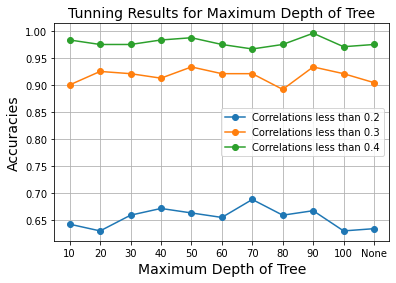

In [ ]:
# Visualizing Results - Accuracy
plt.plot(DEPTH, acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(DEPTH, acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(DEPTH, acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Maximum Depth of Tree', fontsize=14)
plt.xlabel('Maximum Depth of Tree', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

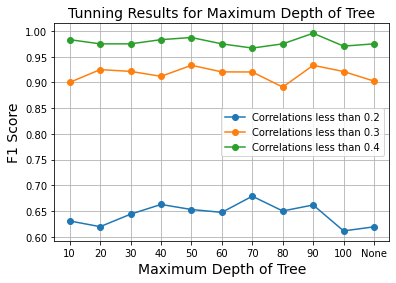

In [ ]:
# Visualizing Results - F1 Score
plt.plot(DEPTH, f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(DEPTH, f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(DEPTH, f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Maximum Depth of Tree', fontsize=14)
plt.xlabel('Maximum Depth of Tree', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Tunning on Minimum Samples Split**

In [ ]:
# Tunning on min_samples_split
# defining parameter range
MINSAMPLES = [2, 5, 10, 20, 50]
GRID_ACC = []
GRID_F1 = []
GRID_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
GRID_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in MINSAMPLES:
  PRED = []
  F1 = []
  classifier = RandomForestClassifier(min_samples_split = c)
  for i in range(len(GRID_TRAIN)):
    Acc, FScore = ModelTrainer(GRID_TRAIN[i], y_train, GRID_TEST[i], y_test, classifier)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

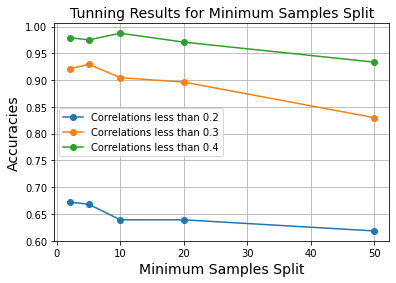

In [ ]:
# Visualizing Results - Accuracy
plt.plot(MINSAMPLES, acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(MINSAMPLES, acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(MINSAMPLES, acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Minimum Samples Split', fontsize=14)
plt.xlabel('Minimum Samples Split', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

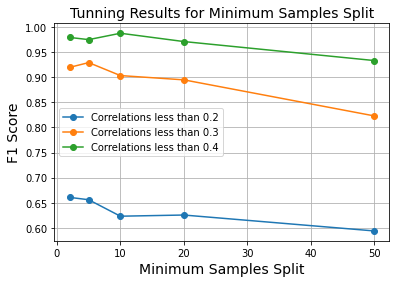

In [ ]:
# Visualizing Results - F1 Score
plt.plot(MINSAMPLES, f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(MINSAMPLES, f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(MINSAMPLES, f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Minimum Samples Split', fontsize=14)
plt.xlabel('Minimum Samples Split', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Tunning on Minimum Samples Leaf**

In [ ]:
# Tunning on min_samples_leaf
# defining parameter range
MINLEAF = [1, 2, 4, 8, 16, 32]
GRID_ACC = []
GRID_F1 = []
GRID_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
GRID_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in MINLEAF:
  PRED = []
  F1 = []
  classifier = RandomForestClassifier(min_samples_leaf = c)
  for i in range(len(GRID_TRAIN)):
    Acc, FScore = ModelTrainer(GRID_TRAIN[i], y_train, GRID_TEST[i], y_test, classifier)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

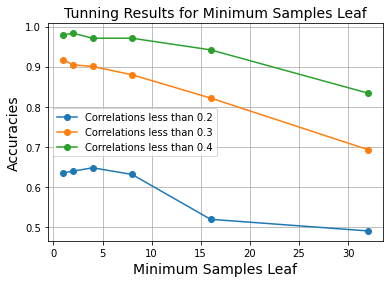

In [ ]:
# Visualizing Results - Accuracy
plt.plot(MINLEAF, acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(MINLEAF, acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(MINLEAF, acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Minimum Samples Leaf', fontsize=14)
plt.xlabel('Minimum Samples Leaf', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

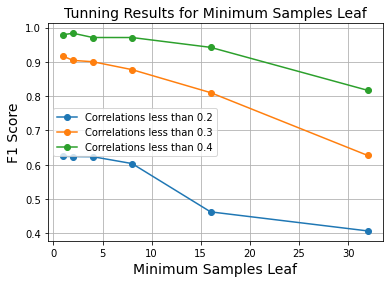

In [ ]:
# Visualizing Results - F1 Score
plt.plot(MINLEAF, f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(MINLEAF, f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(MINLEAF, f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Minimum Samples Leaf', fontsize=14)
plt.xlabel('Minimum Samples Leaf', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### Neural Networks

In this section, we are going to explore the training through neural nets

In [ ]:
# Importing Necessary Packages
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import regularizers
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Defining the Neural Net to give accuracy and f1 score after training

# This function will return the accuracy and f1 score on test set along with model history for given parameters
def NeuralNetTrain(X_train, y_train, X_test, y_test, n_layers, n_neurons, l1):
  onehotencoder = OneHotEncoder()
  y_onehot = onehotencoder.fit_transform(y_train).toarray()

  classifier = Sequential()
  # Input Layer
  classifier.add(Dense(units = 512, kernel_initializer = 'glorot_uniform', input_dim = X_train.shape[1], activation = 'relu', bias_regularizer=regularizers.l1(l1), kernel_regularizer=regularizers.l1(l1)))
  classifier.add(BatchNormalization())
  for i in range(n_layers):
    classifier.add(Dense(units = n_neurons, kernel_initializer = 'glorot_uniform', activation = 'relu', bias_regularizer=regularizers.l1(l1), kernel_regularizer=regularizers.l1(l1)))
    classifier.add(BatchNormalization())
  classifier.add(Dropout(0.5))
  # Output Layer
  classifier.add(Dense(units = 5, kernel_initializer = 'glorot_uniform', activation = 'softmax', bias_regularizer=regularizers.l1(l1), kernel_regularizer=regularizers.l1(l1)))
  # Compiling
  classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  model_history = classifier.fit(X_train, y_onehot, batch_size = 15, epochs = 100)

  # Predicting the Category on Test data
  y_pred = classifier.predict(X_test)
  y_pred_onehot = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)
  # Reverse One hot
  y_pred = np.argmax(y_pred_onehot, axis = 1)

  acc = accuracy_score(y_test, y_pred)
  f1score = f1_score(y_test, y_pred, average = 'weighted')

  return acc, f1score, model_history


For evaluating the neural net on different parameters, we are taking certain parameters as common:

- n_layers = 4
- n_neurons = 256
- l1 = 1e-3

In [ ]:
# Preparing the arrays to apply models
DIM = [1665, 500, 424, 51]
DES = ['Correlation less than 0.4',
       'PCA-explained variance of 99%', 'Correlation less than 0.3', 'Correlation less than 0.2']
DATA_TRAIN = [X_train[selected_columns_4],
        X_train_pca, X_train[selected_columns_3], X_train[selected_columns_2]]
DATA_TEST = [X_test[selected_columns_4],
        X_test_pca, X_test[selected_columns_3], X_test[selected_columns_2]]

In [ ]:
# Training on Neural Network

ACCURACY = []
F1SCORE = []
MODELHIST = []
for i in range(len(DATA_TRAIN)):
  Acc, FScore, modelhist = NeuralNetTrain(DATA_TRAIN[i], y_train, DATA_TEST[i], y_test, n_layers=4, n_neurons=256, l1=1e-3)
  ACCURACY.append(Acc)
  F1SCORE.append(FScore)
  MODELHIST.append(modelhist)

Epoch 1/100
38/38 [==============================] - 2s 14ms/step - loss: 34.8770 - accuracy: 0.6893
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 28.9377 - accuracy: 0.9536
Epoch 3/100
38/38 [==============================] - 1s 13ms/step - loss: 26.5050 - accuracy: 0.9696
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 24.4578 - accuracy: 0.9679
Epoch 5/100
38/38 [==============================] - 1s 13ms/step - loss: 22.5837 - accuracy: 0.9786
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 21.1925 - accuracy: 0.9679
Epoch 7/100
38/38 [==============================] - 1s 13ms/step - loss: 19.6719 - accuracy: 0.9821
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 18.2980 - accuracy: 0.9804
Epoch 9/100
38/38 [==============================] - 0s 13ms/step - loss: 16.8757 - accuracy: 0.9804
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 15.4700 - accura

In [ ]:
# Visualizing Results in Dataframe
result_df = pd.DataFrame()
result_df['Dimensions'] = DIM
result_df['Description'] = DES
result_df['Accuracy'] = ACCURACY
result_df['F1 Score'] = F1SCORE
result_df

,Dimensions,Description,Accuracy,F1 Score
0,1665,Correlation less than 0.4,0.510373,0.395715
1,500,PCA-explained variance of 99%,1.000000,1.000000
2,424,Correlation less than 0.3,0.842324,0.815901
3,51,Correlation less than 0.2,0.535270,0.516913


In [ ]:
# Defining function for plotting loss and accuracy curve
def LossAccCurve(model_history):
  # Plotting the model history
  loss_arr = model_history.history['loss']
  acc_arr = model_history.history['accuracy']

  plt.title("Loss curve of model")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(loss_arr)
  plt.grid()
  plt.show()

  plt.title("Accuracy curve of model")
  plt.xlabel("Epochs")
  plt.ylabel("Training Accuracy")
  plt.plot(acc_arr)
  plt.grid()
  plt.show()

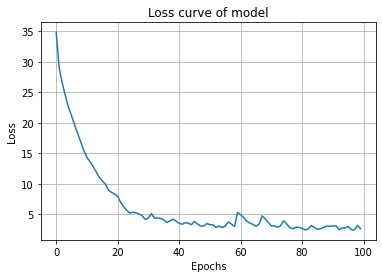

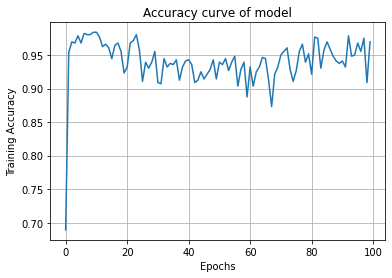

In [ ]:
# Loss Curves for model having 1665 dims
LossAccCurve(MODELHIST[0])

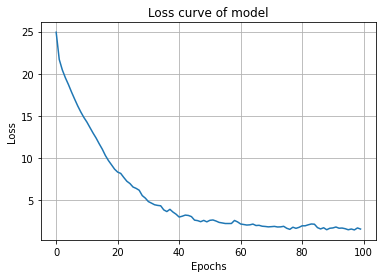

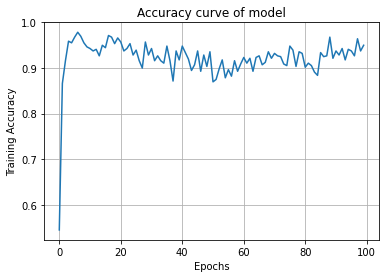

In [ ]:
# Loss Curves for model having 424 dims
LossAccCurve(MODELHIST[2])

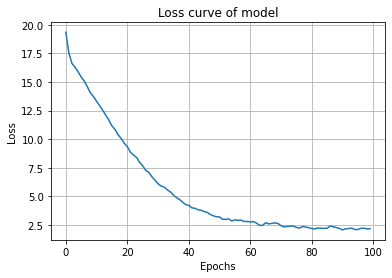

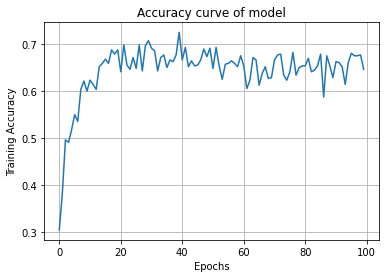

In [ ]:
# Loss Curves for model having 51 dims
LossAccCurve(MODELHIST[3])

**Tunning on Number of Layers in the neural net**

Keeping other parameters same.

In [ ]:
# defining array of values
LAYERS = [2,4,8,16]
GRID_ACC = []
GRID_F1 = []
GRID_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
GRID_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in LAYERS:
  PRED = []
  F1 = []
  for i in range(len(GRID_TRAIN)):
    Acc, FScore, mh = NeuralNetTrain(GRID_TRAIN[i], y_train, GRID_TEST[i], y_test, n_layers=c, n_neurons=256, l1=1e-3)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

Epoch 1/100
38/38 [==============================] - 4s 26ms/step - loss: 27.2179 - accuracy: 0.7911
Epoch 2/100
38/38 [==============================] - 1s 34ms/step - loss: 20.3502 - accuracy: 0.9804
Epoch 3/100
38/38 [==============================] - 1s 25ms/step - loss: 17.5409 - accuracy: 0.9714
Epoch 4/100
38/38 [==============================] - 1s 22ms/step - loss: 15.3217 - accuracy: 0.9714
Epoch 5/100
38/38 [==============================] - 1s 22ms/step - loss: 13.3153 - accuracy: 0.9893
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 11.8470 - accuracy: 0.9839
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 10.5256 - accuracy: 0.9875
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 9.1006 - accuracy: 0.9857
Epoch 9/100
38/38 [==============================] - 1s 15ms/step - loss: 8.4715 - accuracy: 0.9893
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 7.4945 - accuracy:

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

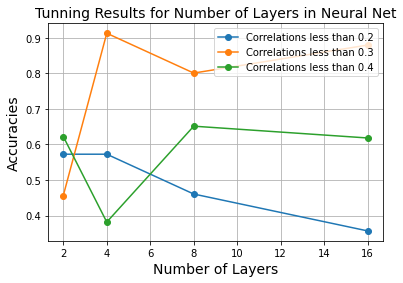

In [ ]:
# Visualizing Results - Accuracy
plt.plot(LAYERS, acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(LAYERS, acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(LAYERS, acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Number of Layers in Neural Net', fontsize=14)
plt.xlabel('Number of Layers', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

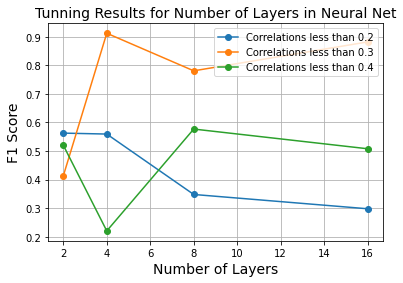

In [ ]:
# Visualizing Results - F1 Score
plt.plot(LAYERS, f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(LAYERS, f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(LAYERS, f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Number of Layers in Neural Net', fontsize=14)
plt.xlabel('Number of Layers', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Tunning on Number of Neurons in a layer in neural net**

In [ ]:
# defining array of values
NEURONS = [64,128,256,512,1024]
GRID_ACC = []
GRID_F1 = []
GRID_TRAIN = [X_train[selected_columns_4], X_train[selected_columns_3], X_train[selected_columns_2]]
GRID_TEST = [X_test[selected_columns_4], X_test[selected_columns_3], X_test[selected_columns_2]]

for c in NEURONS:
  PRED = []
  F1 = []
  for i in range(len(GRID_TRAIN)):
    Acc, FScore, mh = NeuralNetTrain(GRID_TRAIN[i], y_train, GRID_TEST[i], y_test, n_layers=4, n_neurons=c, l1=1e-3)
    PRED.append(Acc)
    F1.append(FScore)
  GRID_ACC.append(PRED)
  GRID_F1.append(F1)

Epoch 1/100
38/38 [==============================] - 5s 13ms/step - loss: 21.9803 - accuracy: 0.5125
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 16.7435 - accuracy: 0.8125
Epoch 3/100
38/38 [==============================] - 1s 15ms/step - loss: 14.9857 - accuracy: 0.9143
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 13.5462 - accuracy: 0.9429
Epoch 5/100
38/38 [==============================] - 0s 10ms/step - loss: 12.2965 - accuracy: 0.9589
Epoch 6/100
38/38 [==============================] - 0s 9ms/step - loss: 11.2521 - accuracy: 0.9446
Epoch 7/100
38/38 [==============================] - 0s 10ms/step - loss: 10.8102 - accuracy: 0.9536
Epoch 8/100
38/38 [==============================] - 0s 9ms/step - loss: 9.9923 - accuracy: 0.9696
Epoch 9/100
38/38 [==============================] - 0s 9ms/step - loss: 9.1174 - accuracy: 0.9625
Epoch 10/100
38/38 [==============================] - 0s 10ms/step - loss: 8.5716 - accuracy: 0.

In [ ]:
# Saving accuracies and F1 scores for data having correlations less than 0.2
acc_arr_2 = []
f1_arr_2 = []
for i in range(len(GRID_ACC)):
  acc_arr_2.append(GRID_ACC[i][2])
  f1_arr_2.append(GRID_F1[i][2])

# Saving accuracies and F1 scores for data having correlations less than 0.3
acc_arr_3 = []
f1_arr_3 = []
for i in range(len(GRID_ACC)):
  acc_arr_3.append(GRID_ACC[i][1])
  f1_arr_3.append(GRID_F1[i][1])

# Saving accuracies and F1 scores for data having correlations less than 0.4
acc_arr_4 = []
f1_arr_4 = []
for i in range(len(GRID_ACC)):
  acc_arr_4.append(GRID_ACC[i][0])
  f1_arr_4.append(GRID_F1[i][0])

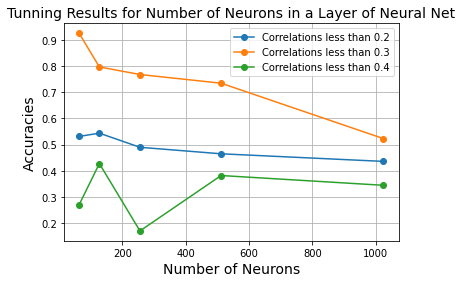

In [ ]:
# Visualizing Results - Accuracy
plt.plot(NEURONS, acc_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(NEURONS, acc_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(NEURONS, acc_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Number of Neurons in a Layer of Neural Net', fontsize=14)
plt.xlabel('Number of Neurons', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

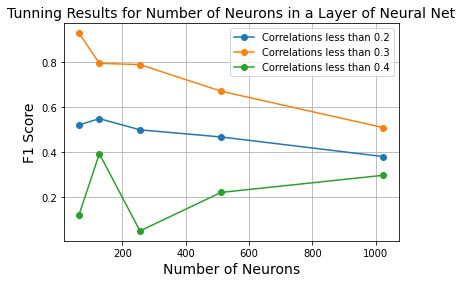

In [ ]:
# Visualizing Results - F1 Score
plt.plot(NEURONS, f1_arr_2, label='Correlations less than 0.2', marker='o')
plt.plot(NEURONS, f1_arr_3, label='Correlations less than 0.3', marker='o')
plt.plot(NEURONS, f1_arr_4, label='Correlations less than 0.4', marker='o')
plt.title('Tunning Results for Number of Neurons in a Layer of Neural Net', fontsize=14)
plt.xlabel('Number of Neurons', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### Comparision Between Models

In [ ]:
MODELS = ['Logistic Regression', 'SVM', 'KNN', 'RFC', 'Gaussian NB', 'Neural Net']
DIM = [18307, 8848, 1665, 500, 424, 51]
DES = ['Correlation less than 0.8', 'Correlation less than 0.6', 'Correlation less than 0.4',
       'PCA-explained variance of 99%', 'Correlation less than 0.3', 'Correlation less than 0.2']

ACC_LR = [1,1,1,1,0.946,0.589]
ACC_SVM = [1,1,0.996,1,0.938,0.373]
ACC_KNN = [0.992,0.996,0.871,0.992,0.768,0.432]
ACC_RFC = [0.996,0.996,0.976,0.987,0.929,0.659]
ACC_NB = [0.763,0.697,0.734,0.979,0.659,0.216]
ACC_NN = ['NA', 'NA', 0.510, 1, 0.842, 0.535]

RESULT_DF = pd.DataFrame()
RESULT_DF['Datasets'] = DES
RESULT_DF['Dimensions'] = DIM
RESULT_DF['Logistic Regression'] = ACC_LR
RESULT_DF['SVM'] = ACC_SVM
RESULT_DF['KNN'] = ACC_KNN
RESULT_DF['RFC'] = ACC_RFC
RESULT_DF['Gaussian NB'] = ACC_NB
RESULT_DF['Neural Net'] = ACC_NN

RESULT_DF

,Datasets,Dimensions,Logistic Regression,SVM,KNN,RFC,Gaussian NB,Neural Net
0,Correlation less than 0.8,18307,1.000,1.000,0.992,0.996,0.763,NA
1,Correlation less than 0.6,8848,1.000,1.000,0.996,0.996,0.697,NA
2,Correlation less than 0.4,1665,1.000,0.996,0.871,0.976,0.734,0.51
3,PCA-explained variance of 99%,500,1.000,1.000,0.992,0.987,0.979,1
4,Correlation less than 0.3,424,0.946,0.938,0.768,0.929,0.659,0.842
5,Correlation less than 0.2,51,0.589,0.373,0.432,0.659,0.216,0.535


In [ ]:
RESULT_DF.iloc[3, :].values[1:]

array([500, 1.0, 1.0, 0.992, 0.987, 0.979, 1], dtype=object)

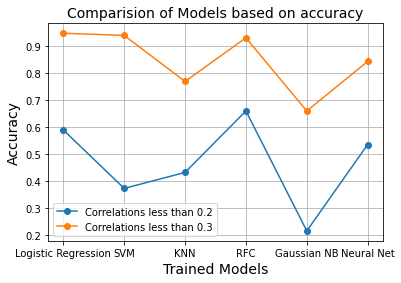

In [ ]:
# Visualizing Results - F1 Score
plt.plot(MODELS, RESULT_DF.iloc[5, :].values[2:], label='Correlations less than 0.2', marker='o')
plt.plot(MODELS, RESULT_DF.iloc[4, :].values[2:], label='Correlations less than 0.3', marker='o')
plt.title('Comparision of Models based on accuracy', fontsize=14)
plt.xlabel('Trained Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Based on the above analysis, we can conclude that we can move forward with the dataset having features whose correlations are less than 0.3, as that dataset is showing significant accuracy on 3 of the models.

We need to analyze the hyperparameters of these 3 models based on the hyper-parameter tunning done for this dataset on these 3 models.

These 3 models are:
- Logistic Regression
- SVM
- RFC

Logistic Regression has its accuracy of 0.946

After analyzing the parameters, we got the best parameters using SVM is C=10 with 0.958 accuracy

After analyzing the parameters, we got the best parameters using RFC are Number of Estimators=100, Maximum Depth of Tree = 90, min_samples_split = 5, and min_samples_leaf = 1. From the below cell, we can see the accuracy of 0.913 from the best parameters.

**So, from here we can conclude, that we can use Logistic Regression and SVC(C = 10) as best benchmarking models for the dataset for further analysis.**

In [ ]:
classifier = RandomForestClassifier(max_depth = 90, n_estimators = 100, min_samples_split = 5, min_samples_leaf = 1)
Acc, FScore = ModelTrainer(X_train[selected_columns_3], y_train, X_test[selected_columns_3], y_test, classifier)
print(Acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9128630705394191



### Feature Selection through Neural Networks

In this section we are going to implement the methodology of Teacher Student Network to the get the feature rankings for feature selection.

Link to the paper - https://arxiv.org/pdf/1903.07045.pdf


In [ ]:
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras import regularizers

# Defining the Feature Selection network as Student Network
from sklearn.metrics import mean_squared_error
def loss_mse(y, y_true):
    return mean_squared_error(y_true, y)

# Defining Student Network for training and rankings
def train_fs_network(X, rep=None, loss='mse', batch_size = 20, epochs = 10):
  hidden =rep.shape[1]
  dim = X.shape[1]

  # Defining the Layers of Student network
  y1 = Input((dim,))
  y2 = Dense(10*hidden, activation='relu', kernel_initializer = 'glorot_uniform', bias_regularizer=regularizers.l1(1e-4), kernel_regularizer=regularizers.l1(1e-4))(y1)
  y3 = Dense(hidden, kernel_initializer = 'glorot_uniform', bias_regularizer=regularizers.l1(1e-4), kernel_regularizer=regularizers.l1(1e-4))(y2)

  fs_model = Model(y1, y3)
  fs_model.compile(optimizer='adam', loss=loss)
  L = rep
  model_history = fs_model.fit(X, L, epochs=epochs, batch_size=batch_size, validation_split=.05, verbose=1)

  w1 = fs_model.layers[2].get_weights()[0]
  w2 = np.sum(np.square(w1),1)
  w3 = fs_model.layers[1].get_weights()[0]
  w4 = w3*w2
  w = np.sum(np.square(w4),1)
  return w

We are going to compare performances on different types of encoders, and choose the best encoder among them. Total Encoders we are going to take are:

- Isomap
- TSNE
- LocallyLinearEmbedding
- MDS
- SpectralEmbedding
- Supervised Neural Net Encoder
- Unsupervised Neural Net Encoder

Reference Github Repo - https://github.com/alimirzaei/TSFS


In [ ]:
# Defining all the encoders
from sklearn.manifold import Isomap,TSNE,LocallyLinearEmbedding,MDS, SpectralEmbedding
from keras.layers import BatchNormalization

# Isomap
def my_isomap(X, y=None, n_components=2):
  # defining the encoding model
  model = Isomap(n_components=n_components)
  # find the encodings
  codes = model.fit_transform(X)
  # normalizing the encodings
  codes = (codes-np.min(codes))/(np.max(codes)-np.min(codes))
  # Finding the score of respective features
  score = train_fs_network(X,rep=codes,  epochs=200, loss='mse')
  # sort the feature scores in an ascending order according to the feature scores
  idx = np.argsort(score)[::-1]
  return idx, score

# TSNE
def my_tsne(X, y=None, n_components=2):
  # defining the encoding model
  model = TSNE(n_components=n_components)
  # find the encodings
  codes = model.fit_transform(X)
  # normalizing the encodings
  codes = (codes-np.min(codes))/(np.max(codes)-np.min(codes))
  # Finding the score of respective features
  score = train_fs_network(X,rep=codes,  epochs=200, loss='mse')
  # sort the feature scores in an ascending order according to the feature scores
  idx = np.argsort(score)[::-1]
  return idx, score

# LLE
def my_lle(X, y=None, n_components=2):
  # defining the encoding model
  model = LocallyLinearEmbedding(n_components=n_components)
  # find the encodings
  codes = model.fit_transform(X)
  # normalizing the encodings
  codes = (codes-np.min(codes))/(np.max(codes)-np.min(codes))
  # Finding the score of respective features
  score = train_fs_network(X,rep=codes,  epochs=200, loss='mse')
  # sort the feature scores in an ascending order according to the feature scores
  idx = np.argsort(score)[::-1]
  return idx, score

# MDS
def my_mds(X, y=None, n_components=2):
  # defining the encoding model
  model = MDS(n_components=n_components)
  # find the encodings
  codes = model.fit_transform(X)
  # normalizing the encodings
  codes = (codes-np.min(codes))/(np.max(codes)-np.min(codes))
  # Finding the score of respective features
  score = train_fs_network(X,rep=codes,  epochs=200, loss='mse')
  # sort the feature scores in an ascending order according to the feature scores
  idx = np.argsort(score)[::-1]
  return idx, score

# Spectral Embedding
def my_se(X, y=None, n_components=2):
  # defining the encoding model
  model = SpectralEmbedding(n_components=n_components)
  # find the encodings
  codes = model.fit_transform(X)
  # normalizing the encodings
  codes = (codes-np.min(codes))/(np.max(codes)-np.min(codes))
  # Finding the score of respective features
  score = train_fs_network(X,rep=codes,  epochs=200, loss='mse')
  # sort the feature scores in an ascending order according to the feature scores
  idx = np.argsort(score)[::-1]
  return idx, score


**Defining Supervised and Unsupervised Encoders**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Defining the supervised encoder
def my_supervised_autoencoder(X, y=None, n_components=2, n_epochs = 200):
  onehotencoder = OneHotEncoder()
  y_onehot = onehotencoder.fit_transform(y).toarray()

  input_tensor = Input(shape=(X.shape[1],))
  l1 = Dense(250, activation='relu')(input_tensor)
  l2 = BatchNormalization()(l1)
  l3 = Dense(250, activation='relu')(l2)
  l4 = BatchNormalization()(l3)
  l5 = Dense(250, activation='relu')(l4)
  l6 = BatchNormalization()(l5)
  l7 = Dense(125, activation='relu')(l6)
  l8 = BatchNormalization()(l7)
  l9 = Dense(125, activation='relu')(l8)
  l10 = BatchNormalization()(l9)
  l11 = Dense(90, activation='relu')(l10)
  l12 = BatchNormalization()(l11)
  l13 = Dense(50, activation='relu')(l12)
  l14 = BatchNormalization()(l13)
  l15 = Dense(n_components, activation='relu')(l14)
  l16 = BatchNormalization()(l15)
  output_tensor = Dense(5, activation='softmax')(l16)

  model = Model(input_tensor, output_tensor)
  encoder = Model(input_tensor, l15)

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
  model_history = model.fit(X, y_onehot, epochs = n_epochs, batch_size=20)
  codes = encoder.predict(X)
  codes = (codes-np.min(codes))/(np.max(codes)-np.min(codes))
  
  score = train_fs_network(X, rep=codes, epochs = n_epochs)

  # sort the feature scores in an ascending order according to the feature scores
  idx = np.argsort(score)[::-1]
  return idx, score

In [ ]:
# Defining the unsupervised Autoencoder 
def my_unsupervised_autoencoder(X, y=None, n_components=2, n_epochs = 100):
  input_tensor = Input(shape=(X.shape[1],))
  l1 = Dense(512, activation='relu')(input_tensor)
  l2 = BatchNormalization()(l1)
  l3 = Dense(380, activation='relu')(l2)
  l4 = BatchNormalization()(l3)
  l5 = Dense(256, activation='relu')(l4)
  l6 = BatchNormalization()(l5)
  l7 = Dense(n_components, activation='relu')(l6)
  l8 = BatchNormalization()(l7)
  l9 = Dense(256, activation='relu')(l8)
  l10 = BatchNormalization()(l9)
  l11 = Dense(380, activation='relu')(l10)
  l12 = BatchNormalization()(l11)
  l13 = Dense(512, activation='relu')(l12)
  l14 = BatchNormalization()(l13)
  output_tensor = Dense(X.shape[1])(l14)

  model = Model(input_tensor, output_tensor)
  encoder = Model(input_tensor, l7)

  model.compile(optimizer='adam', loss='mse')                                
  model_history = model.fit(X, X, epochs = n_epochs, batch_size=20)
  codes = encoder.predict(X)
  codes = (codes-np.min(codes))/(np.max(codes)-np.min(codes))
  
  score = train_fs_network(X, rep=codes, epochs = n_epochs)

  # sort the feature scores in an ascending order according to the feature scores
  idx = np.argsort(score)[::-1]
  return idx, score


In [ ]:
X_train.shape

(560, 20264)

In [ ]:
X_train_FS = X_train[selected_columns_3]
X_test_FS = X_test[selected_columns_3]
print(X_train_FS.shape)
print(X_test_FS.shape)

(560, 424)
(241, 424)


In [ ]:
# Defining Array for storing the values
ENCODER = ['Isomap', 'TSNE', 'LocallyLinearEmbedding', 'MDS', 'SpectralEmbedding', 'Supervised Neural Net Encoder',
           'Supervised Neural Net Encoder', 'Unsupervised Neural Net Encoder']
RANKINGS = []
RANKINGS.append(my_isomap(X_train_FS, n_components=5)[0])
RANKINGS.append(my_tsne(X_train_FS, n_components=3)[0])
RANKINGS.append(my_lle(X_train_FS, n_components=5)[0])
RANKINGS.append(my_mds(X_train_FS, n_components=5)[0])
RANKINGS.append(my_se(X_train_FS, n_components=5)[0])

Epoch 1/200
27/27 [==============================] - 2s 17ms/step - loss: 2.1878 - val_loss: 0.7076
Epoch 2/200
27/27 [==============================] - 0s 6ms/step - loss: 0.6538 - val_loss: 0.5338
Epoch 3/200
27/27 [==============================] - 0s 6ms/step - loss: 0.4746 - val_loss: 0.4539
Epoch 4/200
27/27 [==============================] - 0s 5ms/step - loss: 0.3877 - val_loss: 0.3824
Epoch 5/200
27/27 [==============================] - 0s 5ms/step - loss: 0.3182 - val_loss: 0.3276
Epoch 6/200
27/27 [==============================] - 0s 6ms/step - loss: 0.2736 - val_loss: 0.2960
Epoch 7/200
27/27 [==============================] - 0s 5ms/step - loss: 0.2378 - val_loss: 0.2758
Epoch 8/200
27/27 [==============================] - 0s 6ms/step - loss: 0.2091 - val_loss: 0.2589
Epoch 9/200
27/27 [==============================] - 0s 5ms/step - loss: 0.1901 - val_loss: 0.2618
Epoch 10/200
27/27 [==============================] - 0s 5ms/step - loss: 0.1768 - val_loss: 0.2371
Epoch 11

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Epoch 1/200
27/27 [==============================] - 1s 15ms/step - loss: 0.6692 - val_loss: 0.3239
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 0.2958 - val_loss: 0.2030
Epoch 3/200
27/27 [==============================] - 0s 6ms/step - loss: 0.1475 - val_loss: 0.1114
Epoch 4/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0985 - val_loss: 0.0944
Epoch 5/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0813 - val_loss: 0.0804
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 0.0679 - val_loss: 0.0693
Epoch 7/200
27/27 [==============================] - 0s 5ms/step - loss: 0.0615 - val_loss: 0.0657
Epoch 8/200
27/27 [==============================] - 0s 5ms/step - loss: 0.0582 - val_loss: 0.0631
Epoch 9/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0553 - val_loss: 0.0613
Epoch 10/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0533 - val_loss: 0.0589
Epoch 11

In [ ]:
RANKINGS.append(my_supervised_autoencoder(X_train_FS, y=y_train, n_components=5, n_epochs = 200)[0])
RANKINGS.append(my_unsupervised_autoencoder(X_train_FS, n_components=5, n_epochs = 200)[0])

Epoch 1/200
28/28 [==============================] - 4s 15ms/step - loss: 1.5718 - accuracy: 0.3661
Epoch 2/200
28/28 [==============================] - 0s 13ms/step - loss: 1.1077 - accuracy: 0.6607
Epoch 3/200
28/28 [==============================] - 0s 12ms/step - loss: 0.9246 - accuracy: 0.7375
Epoch 4/200
28/28 [==============================] - 0s 14ms/step - loss: 0.7729 - accuracy: 0.8304
Epoch 5/200
28/28 [==============================] - 0s 12ms/step - loss: 0.6488 - accuracy: 0.8732
Epoch 6/200
28/28 [==============================] - 0s 13ms/step - loss: 0.5408 - accuracy: 0.9250
Epoch 7/200
28/28 [==============================] - 0s 13ms/step - loss: 0.4964 - accuracy: 0.9286
Epoch 8/200
28/28 [==============================] - 0s 15ms/step - loss: 0.4113 - accuracy: 0.9500
Epoch 9/200
28/28 [==============================] - 0s 16ms/step - loss: 0.3506 - accuracy: 0.9607
Epoch 10/200
28/28 [==============================] - 0s 12ms/step - loss: 0.3141 - accuracy: 0.9661

**Finding Accuracies by taking ranked features into account for all the encoders**

We are using Logistic Regression and SVC(C=10) to find the accuracy with the given features taken into account and selected.

In [ ]:
len(RANKINGS)

7

In [ ]:
COLUMN_FS = X_train_FS.columns

In [ ]:
n_features = [20*i for i in range(1, 22)]

Training features on SVC

In [ ]:
n_features = [20*i for i in range(1, 22)]
ENCODER = ['Isomap', 'TSNE', 'LocallyLinearEmbedding', 'MDS', 'SpectralEmbedding', 'Supervised Neural Net Encoder', 'Unsupervised Neural Net Encoder']
acc_fs_isomap = []
acc_fs_tsne = []
acc_fs_lle = []
acc_fs_mds = []
acc_fs_se = []
acc_fs_snne = []
acc_fs_unne = []

classifier = SVC(C=10)
for i in n_features:
  acc_fs_isomap.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[0][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[0][:i]]], y_test, classifier)[0])
  acc_fs_tsne.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[1][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[1][:i]]], y_test, classifier)[0])
  acc_fs_lle.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[2][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[2][:i]]], y_test, classifier)[0])
  acc_fs_mds.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[3][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[3][:i]]], y_test, classifier)[0])
  acc_fs_se.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[4][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[4][:i]]], y_test, classifier)[0])
  acc_fs_snne.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[5][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[5][:i]]], y_test, classifier)[0])
  acc_fs_unne.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[6][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[6][:i]]], y_test, classifier)[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

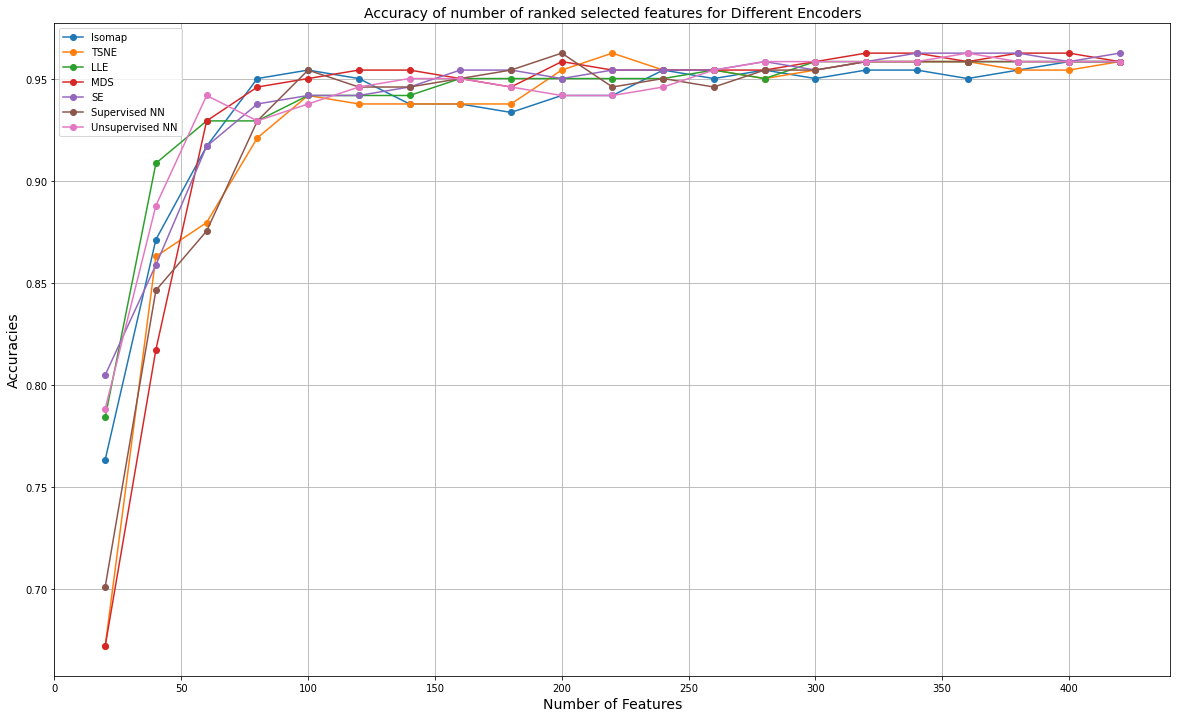

In [ ]:
# Plotting the Accuracies for different number of features and encoders
# Visualizing Results - Accuracy
plt.figure(figsize=(20, 12))
plt.plot(n_features, acc_fs_isomap, label='Isomap', marker='o')
plt.plot(n_features, acc_fs_tsne, label='TSNE', marker='o')
plt.plot(n_features, acc_fs_lle, label='LLE', marker='o')
plt.plot(n_features, acc_fs_mds, label='MDS', marker='o')
plt.plot(n_features, acc_fs_se, label='SE', marker='o')
plt.plot(n_features, acc_fs_snne, label='Supervised NN', marker='o')
plt.plot(n_features, acc_fs_unne, label='Unsupervised NN', marker='o')
plt.title('Accuracy of number of ranked selected features for Different Encoders', fontsize=14)
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Training features on Logistic Regression

In [ ]:
n_features = [20*i for i in range(1, 22)]
ENCODER = ['Isomap', 'TSNE', 'LocallyLinearEmbedding', 'MDS', 'SpectralEmbedding', 'Supervised Neural Net Encoder', 'Unsupervised Neural Net Encoder']
acc_fs_isomap = []
acc_fs_tsne = []
acc_fs_lle = []
acc_fs_mds = []
acc_fs_se = []
acc_fs_snne = []
acc_fs_unne = []

classifier = LogisticRegression()
for i in n_features:
  acc_fs_isomap.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[0][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[0][:i]]], y_test, classifier)[0])
  acc_fs_tsne.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[1][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[1][:i]]], y_test, classifier)[0])
  acc_fs_lle.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[2][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[2][:i]]], y_test, classifier)[0])
  acc_fs_mds.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[3][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[3][:i]]], y_test, classifier)[0])
  acc_fs_se.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[4][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[4][:i]]], y_test, classifier)[0])
  acc_fs_snne.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[5][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[5][:i]]], y_test, classifier)[0])
  acc_fs_unne.append(ModelTrainer(X_train_FS[COLUMN_FS[RANKINGS[6][:i]]], y_train, X_test_FS[COLUMN_FS[RANKINGS[6][:i]]], y_test, classifier)[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

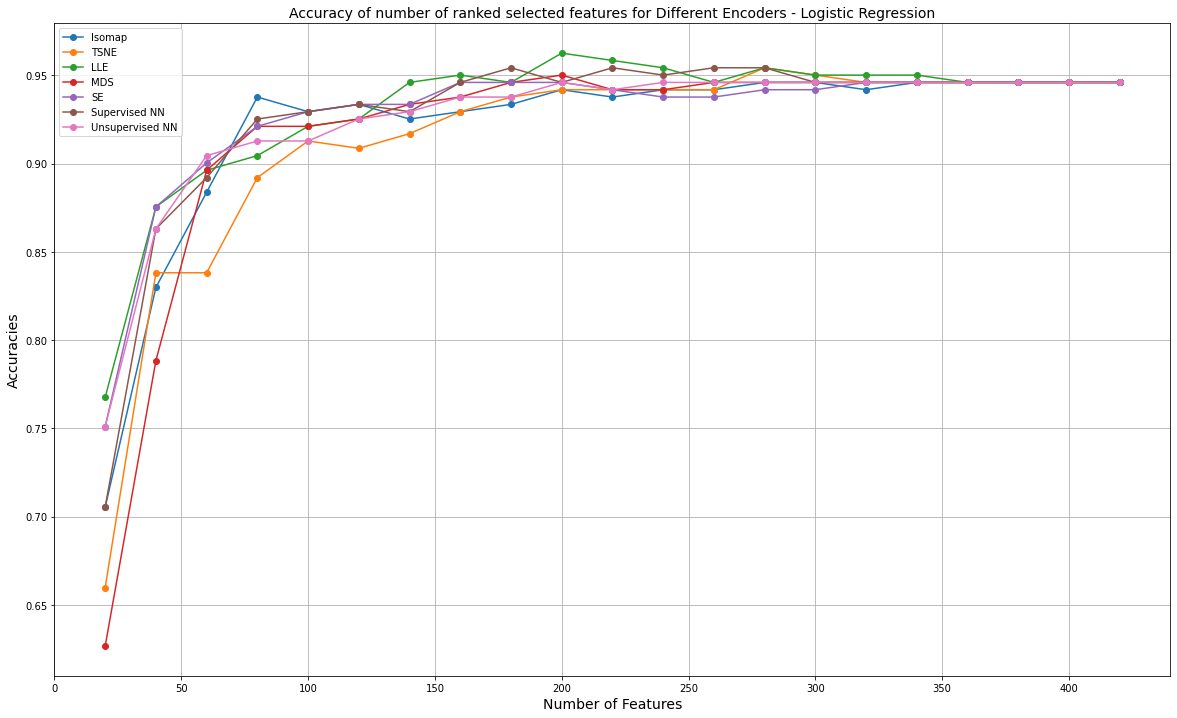

In [ ]:
# Plotting the Accuracies for different number of features and encoders
# Visualizing Results - Accuracy
plt.figure(figsize=(20, 12))
plt.plot(n_features, acc_fs_isomap, label='Isomap', marker='o')
plt.plot(n_features, acc_fs_tsne, label='TSNE', marker='o')
plt.plot(n_features, acc_fs_lle, label='LLE', marker='o')
plt.plot(n_features, acc_fs_mds, label='MDS', marker='o')
plt.plot(n_features, acc_fs_se, label='SE', marker='o')
plt.plot(n_features, acc_fs_snne, label='Supervised NN', marker='o')
plt.plot(n_features, acc_fs_unne, label='Unsupervised NN', marker='o')
plt.title('Accuracy of number of ranked selected features for Different Encoders - Logistic Regression', fontsize=14)
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Accuracies', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

From the above Analysis, we can conclude: 

- From the SVC, we can see more accuracies than the Logistic Regression
- In SVC, for Number of Genes = 60, we got optimum accuracy using unsupervised encoder, which is matching the hypothesis mentioned in the paper. Hence we are going to analyze the effect of dimensions of encodings on Unsupervised Encoder for FS by Student network using SVC.
- In SVC, for Number of Genes = 200, we got optimum accuracy for supervised classifier, which is the maximum among all the data-points on the curve.

**Effect of Size of Encoding in Unsupervised Encoder teacher net and Student Feature selection net**

In [ ]:
N_ENCODE = [2,4,8,16,32,64]
RANKING_encode = []

for n in N_ENCODE:
  RANKING_encode.append(my_unsupervised_autoencoder(X_train_FS, n_components=n, n_epochs = 200)[0])

Epoch 1/200
28/28 [==============================] - 4s 22ms/step - loss: 5.3451
Epoch 2/200
28/28 [==============================] - 1s 22ms/step - loss: 4.6500
Epoch 3/200
28/28 [==============================] - 1s 21ms/step - loss: 3.2120
Epoch 4/200
28/28 [==============================] - 1s 20ms/step - loss: 1.4977
Epoch 5/200
28/28 [==============================] - 1s 20ms/step - loss: 0.7643
Epoch 6/200
28/28 [==============================] - 1s 21ms/step - loss: 0.6586
Epoch 7/200
28/28 [==============================] - 1s 20ms/step - loss: 0.6393
Epoch 8/200
28/28 [==============================] - 1s 19ms/step - loss: 0.6311
Epoch 9/200
28/28 [==============================] - 1s 22ms/step - loss: 0.6227
Epoch 10/200
28/28 [==============================] - 1s 19ms/step - loss: 0.6192
Epoch 11/200
28/28 [==============================] - 1s 23ms/step - loss: 0.6187
Epoch 12/200
28/28 [==============================] - 1s 20ms/step - loss: 0.6146
Epoch 13/200
28/28 [=====

In [ ]:
ACC_encode = []
classifier = SVC(C = 10)
for rank in RANKING_encode:
  ACC_encode.append(ModelTrainer(X_train_FS[COLUMN_FS[rank[:60]]], y_train, X_test_FS[COLUMN_FS[rank[:60]]], y_test, classifier)[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

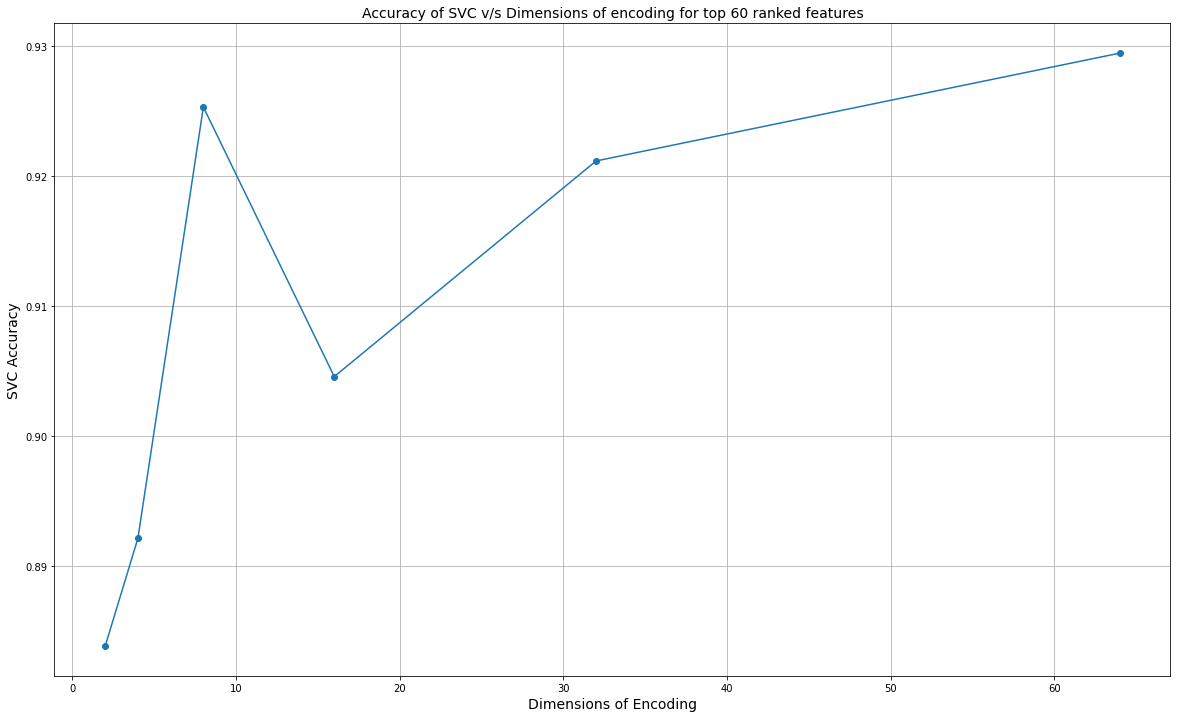

In [ ]:
# Plotting the Accuracies for different number of neurons in encodings v/s accuracy of top 60 feature genes
# Visualizing Results - Accuracy
plt.figure(figsize=(20, 12))
plt.plot(N_ENCODE, ACC_encode, marker='o')
plt.title('Accuracy of SVC v/s Dimensions of encoding for top 60 ranked features', fontsize=14)
plt.xlabel('Dimensions of Encoding', fontsize=14)
plt.ylabel('SVC Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Applying Forward Elimination for Feature Selection

**We are going to use chi2 test and select KBest features according to the chi2 score on the same dataset having 424 features, whose correlations are less than 0.3**

In [ ]:
#K best features 

from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

fwd_accuracy = []
for j in range(1,425):
    test = SelectKBest(score_func=chi2, k=j)
    fit = test.fit(X_train_FS, y_train)
    # print(fit.scores_)
    
    X_new= test.fit_transform(X_train_FS, y_train)
    X_kbest = pd.DataFrame(X_new)
    

    model = SVC(C=10)
    # C is the regularisation strength, penalizes overfitting. 
    model.fit(X_kbest, y_train)

    X_new_test = test.transform(X_test_FS)
    X_kbest_test = pd.DataFrame(X_new_test)    
    cm = confusion_matrix(y_test, model.predict(X_kbest_test))

    correctly_classified = np.sum(np.diagonal(cm))
    total_classified = np.sum(cm)
    fwd_accuracy.append(correctly_classified/total_classified)


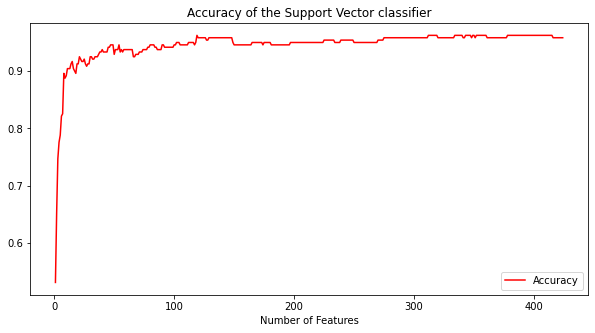

In [ ]:
# Visualizing the analysis
data = pd.DataFrame()
data['Number of Features']= np.linspace(1,424, num = 424)
data['Accuracy'] = fwd_accuracy

data.plot(kind = 'line', x = 'Number of Features', y  = 'Accuracy', color = 'red',
         title = 'Accuracy of the Support Vector classifier', figsize = (10,5))

In [ ]:
# Accuracy at Number of Features = 60
print(fwd_accuracy[59])

0.9377593360995851


### Applying Backward Elimination for Feature Selection

We are going to eliminate the features on the basis of P-values, having a threshold that all the features must have P-value smaller than 0.05

In [ ]:
onehotencoder = OneHotEncoder()
y_be_train = onehotencoder.fit_transform(y_train)
y_be_test = onehotencoder.transform(y_test)

In [ ]:
y_train.value_counts()

Class
2        210
3        102
1         99
0         95
4         54
dtype: int64

Maximum samples are from Class 2, hence we are going to take class 2 into consideration for backward elimination using P-values

In [ ]:
y_be_train = y_be_train.toarray()
y_BE_train = []
for yarr in y_be_train:
  res = 0
  if(yarr[2] == 1):
    res = 1
  y_BE_train.append(res)

y_be_test = y_be_test.toarray()
y_BE_test = []
for yarr in y_be_test:
  res = 0
  if(yarr[2] == 1):
    res = 1
  y_BE_test.append(res)

In [ ]:
# Defining the Backward elimination function
import statsmodels.api as sm

def backwardElimination(X, y, sl, columns):
    numVars = len(X[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, X).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    X = np.delete(X, j, 1)
                    columns = np.delete(columns, j)
                    
    print(regressor_OLS.summary())
    return X, columns

In [ ]:
# Removing the Features whose P-values are greater than 0.05
SL = 0.05
X_temp = X_train_FS
X_transformed, X_columns_BE = backwardElimination(X_temp.values, y_BE_train, SL, selected_columns_3)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              45.22
Date:                Thu, 05 May 2022   Prob (F-statistic):                   1.45e-186
Time:                        15:27:12   Log-Likelihood:                          159.29
No. Observations:                 560   AIC:                                     -110.6
Df Residuals:                     456   BIC:                                      339.5
Df Model:                         104                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We have got 104 features from backward elimination whose p-values are less than 0.05

**Testing The Accuracy through SVC and Logistic Regression**

In [ ]:
classifier = LogisticRegression()
acc_BE_logit, F1_BE_logit = ModelTrainer(X_train_FS[X_columns_BE], y_train, X_test_FS[X_columns_BE], y_test, classifier)


classifier = SVC(C=10)
acc_BE_SVC, F1_BE_SVC = ModelTrainer(X_train_FS[X_columns_BE], y_train, X_test_FS[X_columns_BE], y_test, classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [ ]:
# Printing Accuracy on 104 Features
print("SVC Accuracy : " + str(acc_BE_SVC))
print("SVC F1 Score : " + str(F1_BE_SVC))
print("Logistic Regression Accuracy : "  + str(acc_BE_logit))
print("Logistic Regression F1 Score : " + str(F1_BE_logit))

SVC Accuracy : 0.9336099585062241
SVC F1 Score : 0.9335063880192103
Logistic Regression Accuracy : 0.9087136929460581
Logistic Regression F1 Score : 0.908901272148723


**Final Conclusions are mentioned in the PPT**